# Test model on manually added pictures

In [1]:
from model import YOLOv3
from torch.utils.data import DataLoader
import config
import utils
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
optimizer = optim.Adam(
        model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY
    )

# to load
checkpoint = torch.load('checkpoint.pth.tar',map_location=config.DEVICE)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

/home/rollylevente/miniconda3/envs/devenv/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:346: FutureWarning: This IAAAffine is deprecated. Please use Affine instead
  warnings.warn("This IAAAffine is deprecated. Please use Affine instead", FutureWarning)


In [2]:
scaled_anchors = (
        torch.tensor(config.ANCHORS)
        * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
    ).to(config.DEVICE)

In [3]:
def get_manual_loaders(manual_path = 'ANIMAL_VOC/manual_test.csv'):
    from dataset import YOLODataset

    IMAGE_SIZE = config.IMAGE_SIZE
    test_dataset = YOLODataset(
        manual_path,
        transform=config.test_transforms,
        S=[IMAGE_SIZE // 32, IMAGE_SIZE // 16, IMAGE_SIZE // 8],
        img_dir='ANIMAL_VOC/manual_test_images',
        label_dir='ANIMAL_VOC/manual_test_labels',
        anchors=config.ANCHORS,
    )
    test_loader = DataLoader(
        dataset=test_dataset,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
        pin_memory=config.PIN_MEMORY,
        shuffle=False,
        drop_last=False,
    )
    return test_loader

In [4]:
test_loader = get_manual_loaders()

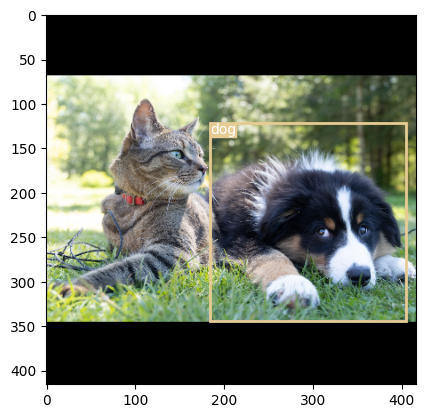

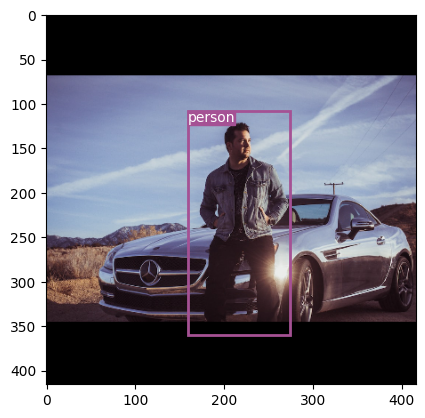

In [5]:
utils.plot_couple_examples(model,test_loader, 0.65, 0.5, scaled_anchors)